In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
movies = pd.read_csv('movies_cleaned.csv')

In [5]:
genres = movies['Genres'].str.split(', ').apply(pd.Series).stack().reset_index()
genres.columns = ['ID', 'Num', 'Genres']
genres.set_index('ID')
df = genres.join(movies['IMDBRating'])

In [6]:
df_ex = df[-df['Genres'].isin(['Crime', 'Family', 'History', 'Music', 'Musical', 'Sport', 'Thriller', 'War', 'Western'])]

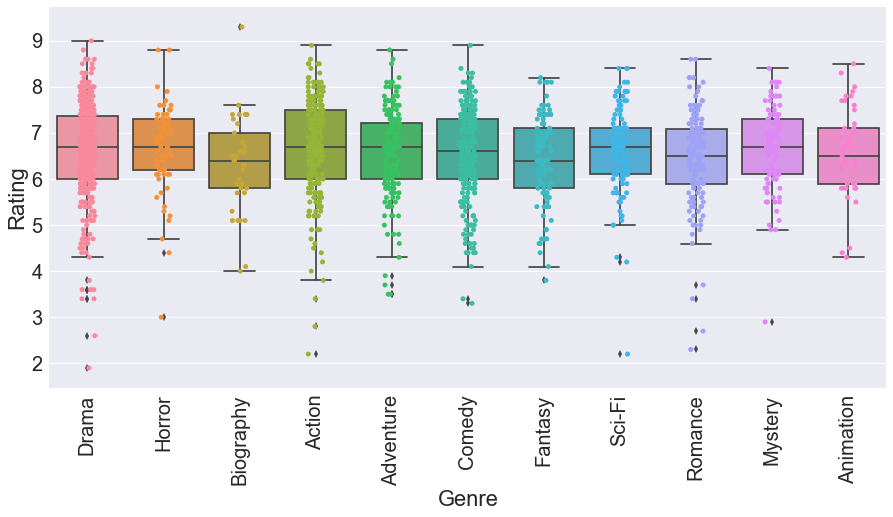

In [47]:
sns.set(font_scale=2)
plt.subplots(figsize=(15, 7))
p = sns.boxplot('Genres', 'IMDBRating', data=df_ex);
p = sns.stripplot('Genres', 'IMDBRating', data=df_ex, jitter=True);
p.set_ylabel('Rating');
p.set_xlabel('Genre');
plt.xticks(rotation=90);
plt.savefig('genres', bbox_inches='tight')

In [65]:
order = df_ex.groupby('Genres')['IMDBRating'].max().sort_values(ascending=False).reset_index()['Genres']

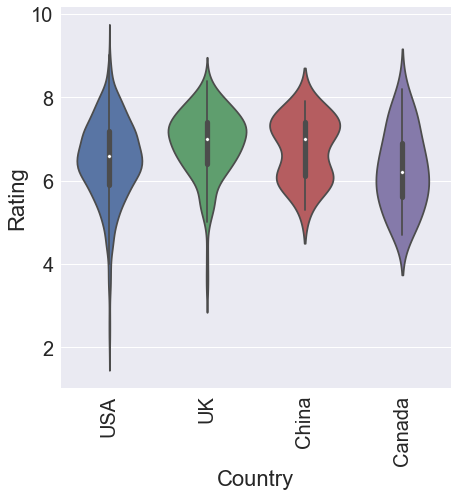

In [25]:
sns.set(font_scale=2)
plt.subplots(figsize=(7, 7))
p = sns.violinplot('Country', 'IMDBRating', data=movies[movies['Country'].isin(['Canada', 'China', 'USA', 'UK'])]);
p.set_ylabel('Rating');
p.set_xlabel('Country');
plt.xticks(rotation=90);
plt.savefig('countries', bbox_inches='tight')